In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
# 主要参考文章 https://blog.csdn.net/u011089523/article/details/61616053
#   https://blog.csdn.net/jacky_zhuyuanlu/article/details/78878405


In [2]:
csv_data = 'E:/code_in_Pycharm/AnIntroductionTo' \
           'StatisticalLearning/ch3/data.csv'
dataFrame = pd.read_csv(csv_data)
print(dataFrame)
# 检验相关性
dataFrame.corr()


   square_feet  price
0          150   6450
1          200   7450
2          250   8450
3          300   9450
4          350  11450
5          400  15450
6          600  18450


,square_feet,price
square_feet,1.000000,0.971941
price,0.971941,1.000000


0    150
1    200
2    250
3    300
4    350
5    400
6    600
Name: square_feet, dtype: int64
   square_feet
0          150
1          200
2          250
3          300
4          350
5          400
6          600
[150 200 250 300 350 400 600]
[[150]
 [200]
 [250]
 [300]
 [350]
 [400]
 [600]]
[28.77659574] 1771.8085106382969


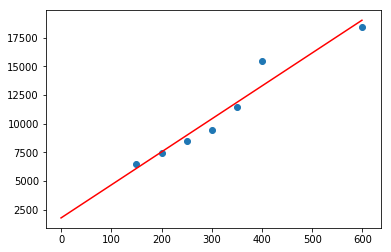

In [3]:
regression = linear_model.LinearRegression()
# print(dataFrame['square_feet'], dataFrame['price'])
# print(dataFrame['square_feet'][1])
# print(dataFrame)
# pandas Series对象values属性
regression.fit(dataFrame['square_feet'].values.reshape(-1, 1), 
               dataFrame['price'].values)
# 等价
# regression.fit(dataFrame[['square_feet']], dataFrame['price'])
print(dataFrame['square_feet'])
print(dataFrame[['square_feet']])
print(dataFrame['square_feet'].values)
print(dataFrame['square_feet'].values.reshape(-1, 1))
k, b = regression.coef_, regression.intercept_
print(k, b)
# print(type(k))
# print(dataFrame[['square_feet']])
x = np.arange(600)
%matplotlib inline
plt.plot(x, k[0]*x + b, color='red')
plt.scatter(dataFrame['square_feet'], dataFrame['price'])


In [4]:
# predict函数的使用
area = 238.5
price_using_function = regression.predict(np.asarray(area).reshape(-1, 1))
print("price_using_function is " + str(price_using_function[0]))
price_using_calculation = k[0]*area + b
print("price_using_calculation is " + str(price_using_calculation))


price_using_function is 8635.026595744679
price_using_calculation is 8635.026595744679


In [7]:
# 对模型进行检验，越接近1越好
regression.score(dataFrame['square_feet'].values.reshape(-1, 1), 
                 dataFrame['price'].values)


0.944668586035943